libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Images have been saved to templates_stripped without color profiles.


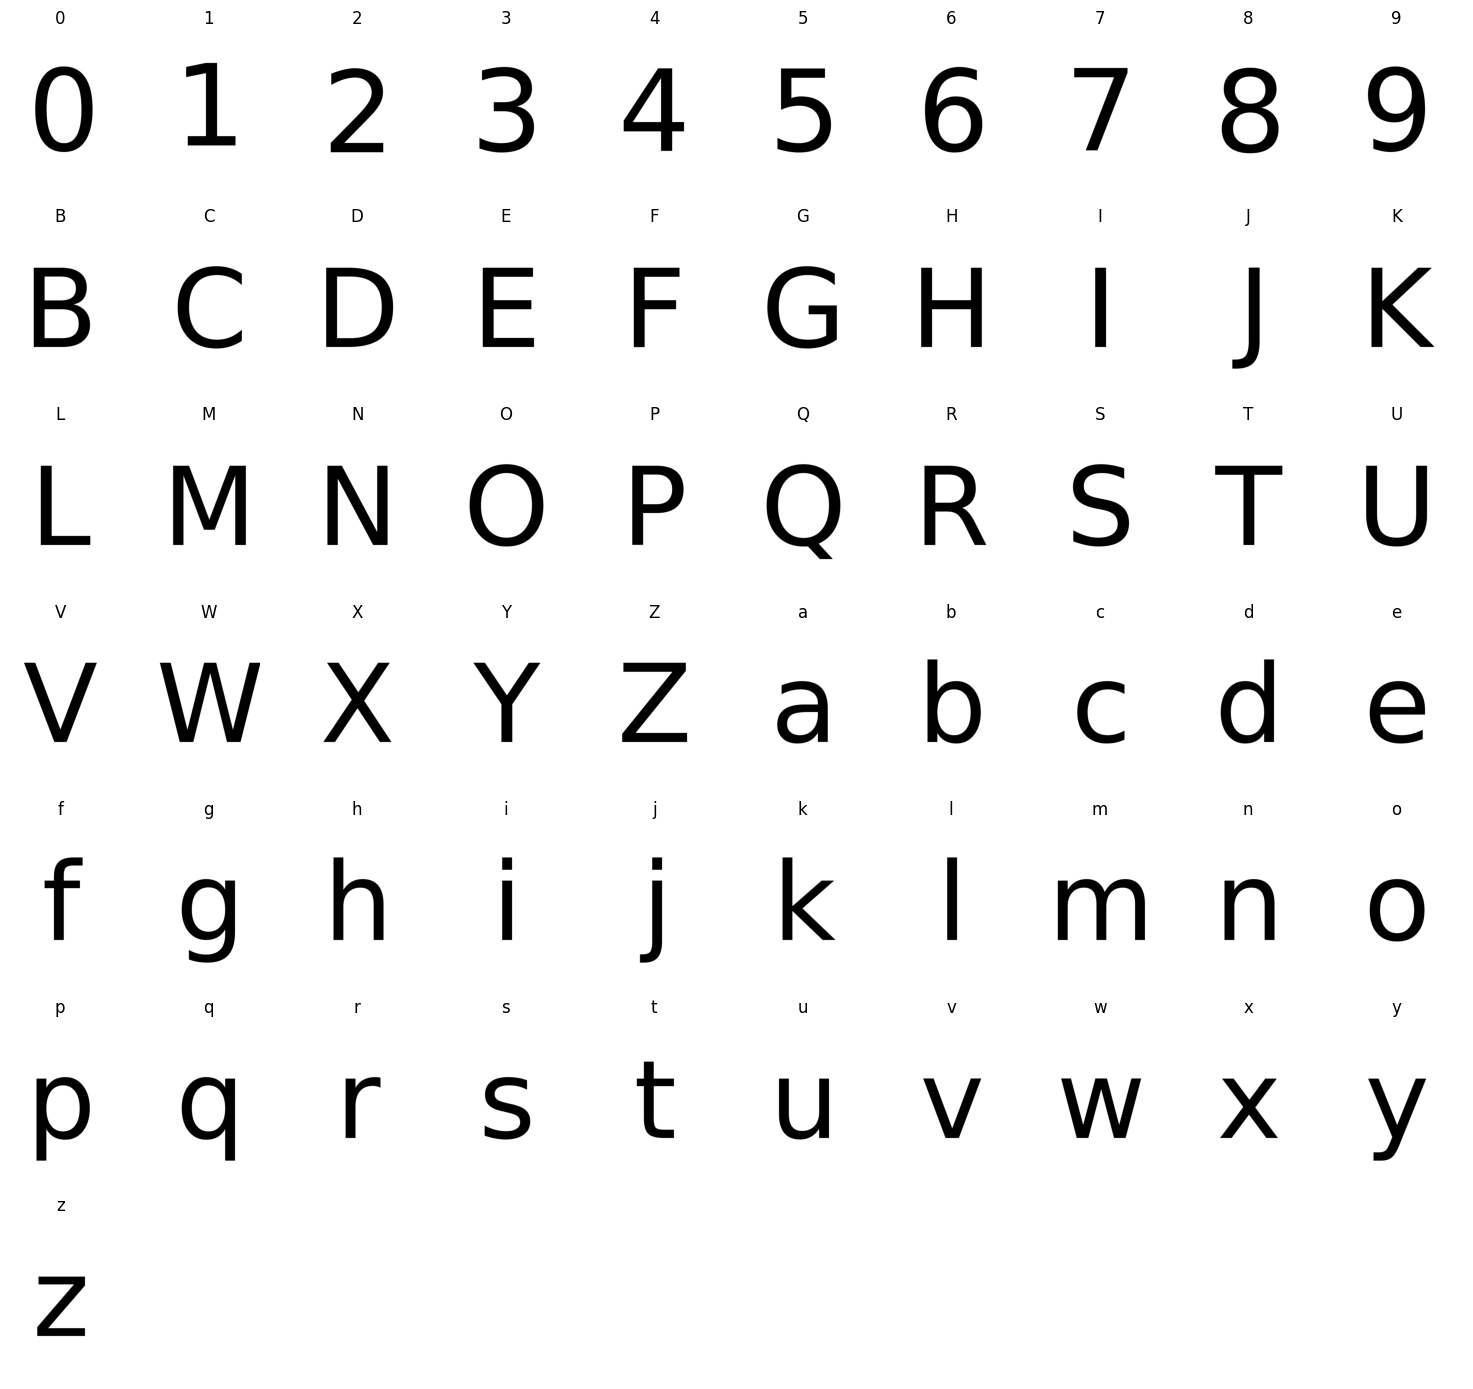

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import re
import warnings

# Suppress specific warnings about incorrect sRGB profiles
warnings.filterwarnings("ignore", message="libpng warning: iCCP: known incorrect sRGB profile")

# Directories
input_dir = "/Users/fajaralbalushi/Desktop/PrintedData"       # Directory with original templates
output_dir = "templates_stripped"  # Directory to save templates without color profiles

# Step 1: Clear the Output Directory to Ensure Overwriting
if os.path.exists(output_dir):
    for file in os.listdir(output_dir):
        file_path = os.path.join(output_dir, file)
        if os.path.isfile(file_path):
            os.remove(file_path)
else:
    os.makedirs(output_dir)

# Step 2: Read and Save Images without Color Profiles
for filename in os.listdir(input_dir):
    if filename.endswith(".png"):
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)
       
        # Save the image to the new directory to remove metadata
        cv2.imwrite(os.path.join(output_dir, filename), image)

print("Images have been saved to", output_dir, "without color profiles.")

# Step 3: Load and Display Templates with Correct Labels (Including Lowercase and Digits)
# Regular expression to match letters (uppercase and lowercase) and digits
pattern = re.compile(r'^([a-zA-Z0-9])')  # Matches uppercase/lowercase letters or digits at the start

# Load all filenames from the new directory
filenames = [f for f in sorted(os.listdir(output_dir)) if f.endswith(".png")]

# Calculate grid size for displaying templates based on the number of images
num_images = len(filenames)
num_cols = 10  # Set number of columns for display grid
num_rows = (num_images // num_cols) + 1 if num_images % num_cols != 0 else num_images // num_cols

# Create subplots for displaying templates
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 2))
axes = axes.flatten()

for i, filename in enumerate(filenames):
    if i >= len(axes):  # Stop if there are more images than subplots
        break
   
    # Extract the character label from the filename using regex
    match = pattern.match(filename)
    if match:
        label = match.group(1)  # Get the matched letter or digit
        template = cv2.imread(os.path.join(output_dir, filename), cv2.IMREAD_GRAYSCALE)
       
        # Display the template with its label
        axes[i].imshow(template, cmap='gray')
        axes[i].set_title(label)
        axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

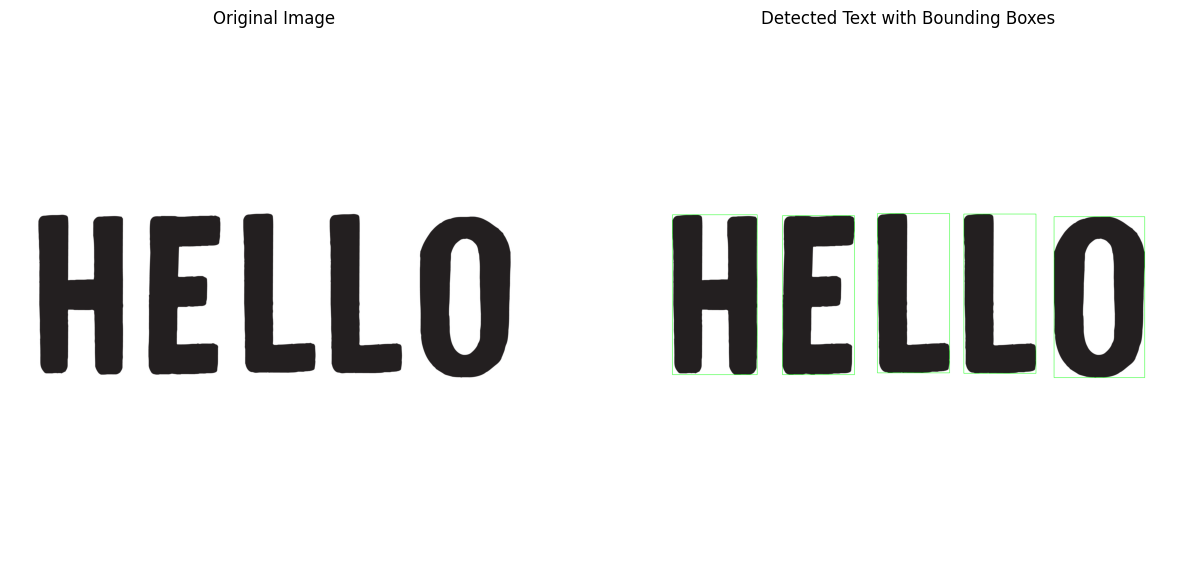

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the test image
test_image_path = "/Users/fajaralbalushi/Desktop/test1.jpg"  # Replace with your actual path

# Step 1: Load the Image
image = cv2.imread(test_image_path)
if image is None:
    print("Error: Image not found.")
else:
    # Step 2: Convert to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply Gaussian Blur to Reduce Noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Step 4: Thresholding to Convert Image to Binary
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Step 5: Find Contours (Text Regions)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 6: Draw Bounding Boxes around Detected Text
    text_boxes_image = image.copy()
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        # Filtering out small contours that may not be text
        if w > 20 and h > 20:  # Adjust these values as needed
            cv2.rectangle(text_boxes_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display Results
    fig, ax = plt.subplots(1, 2, figsize=(15, 10))
    
    # Display original image
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original Image")
    ax[0].axis("off")
    
    # Display image with bounding boxes
    ax[1].imshow(cv2.cvtColor(text_boxes_image, cv2.COLOR_BGR2RGB))
    ax[1].set_title("Detected Text with Bounding Boxes")
    ax[1].axis("off")

    plt.show()


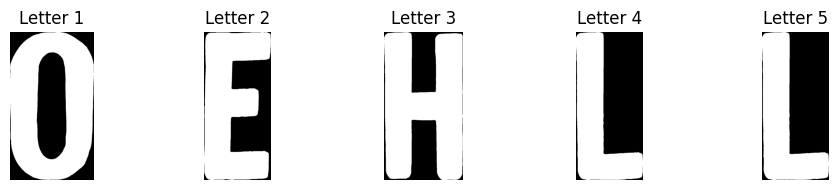

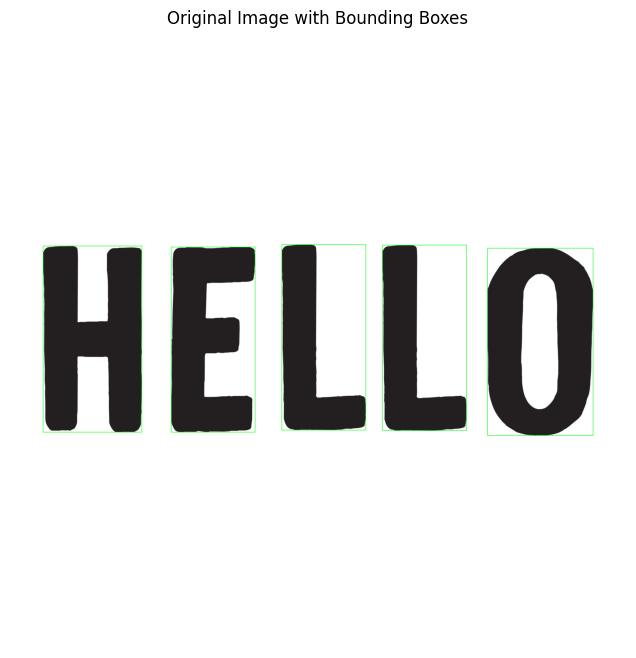

In [14]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Path to the test image
test_image_path = "/Users/fajaralbalushi/Desktop/test1.jpg"  # Replace with your actual path

# Step 1: Load the Image
image = cv2.imread(test_image_path)
if image is None:
    print("Error: Image not found.")
else:
    # Step 2: Convert to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply Gaussian Blur to Reduce Noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Step 4: Thresholding to Convert Image to Binary
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Step 5: Find Contours (Text Regions)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # List to store individual letter images
    letter_images = []

    # Step 6: Process each contour (detected text region)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 20 and h > 20:  # Filter small contours
            # Extract the detected region of interest (ROI)
            roi = binary[y:y+h, x:x+w]
            letter_images.append(roi)  # Save the cropped letter image

            # Draw bounding box around the detected region in the original image
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Step 7: Display the Cropped Letters
    num_letters = len(letter_images)
    num_cols = 5  # Set the number of columns for display grid
    num_rows = (num_letters // num_cols) + 1 if num_letters % num_cols != 0 else num_letters // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 2))
    axes = axes.flatten()

    for i, letter_img in enumerate(letter_images):
        axes[i].imshow(letter_img, cmap='gray')
        axes[i].set_title(f"Letter {i+1}")
        axes[i].axis("off")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

    # Display the original image with bounding boxes for reference
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image with Bounding Boxes")
    plt.axis("off")
    plt.show()


In [16]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Paths
test_image_path = "/Users/fajaralbalushi/Desktop/test1.jpg"  # Replace with your actual path
template_dir = "templates_stripped"  # Directory containing the character templates

# Confidence threshold for matching
confidence_threshold = 0.8

# Step 1: Load the Image
image = cv2.imread(test_image_path)
if image is None:
    print("Error: Image not found.")
else:
    # Step 2: Convert to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply Gaussian Blur to Reduce Noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Step 4: Thresholding to Convert Image to Binary
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Step 5: Find Contours (Text Regions)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Load templates
    templates = {}
    for filename in os.listdir(template_dir):
        if filename.endswith(".png"):
            label = filename.split('.')[0]  # Get character label from filename
            template = cv2.imread(os.path.join(template_dir, filename), cv2.IMREAD_GRAYSCALE)
            templates[label] = template

    extracted_text = ""  # String to store the extracted text
    letter_images = []  # List to store images of each recognized letter with its label

    # Step 6: Process each contour (detected text region)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 20 and h > 20:  # Filter small contours
            # Extract the detected region of interest (ROI)
            roi = binary[y:y+h, x:x+w]

            # Resize ROI to match template size, if necessary
            best_match = None
            best_score = 0.0

            # Step 7: Match with each template
            for label, template in templates.items():
                # Resize ROI if it doesn't match template size
                resized_roi = cv2.resize(roi, (template.shape[1], template.shape[0]))
                
                # Perform template matching
                result = cv2.matchTemplate(resized_roi, template, cv2.TM_CCOEFF_NORMED)
                _, max_val, _, _ = cv2.minMaxLoc(result)

                # Update best match based on similarity score
                if max_val > best_score:
                    best_score = max_val
                    best_match = label

            # Apply the confidence threshold
            if best_score >= confidence_threshold:
                extracted_text += best_match  # Append recognized character to text
                letter_images.append((roi, best_match))  # Store the recognized letter image and label
            else:
                extracted_text += "?"  # If below threshold, mark as unrecognized

            # Draw bounding box around the detected region in the original image
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, best_match if best_score >= confidence_threshold else "?", 
                        (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Step 8: Print and Display the Extracted Text
    print("Extracted Text:", extracted_text)

    # Display each recognized letter with its label
    num_letters = len(letter_images)
    num_cols = 5  # Set the number of columns for display grid
    num_rows = (num_letters // num_cols) + 1 if num_letters % num_cols != 0 else num_letters // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 2))
    axes = axes.flatten()

    for i, (letter_img, label) in enumerate(letter_images):
        axes[i].imshow(letter_img, cmap='gray')
        axes[i].set_title(f"Recognized: {label}")
        axes[i].axis("off")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

    # Display the original image with bounding boxes and recognized text
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image with Recognized Text")
    plt.axis("off")
    plt.show()


Extracted Text: ?????


ValueError: Number of rows must be a positive integer, not 0

<Figure size 1000x0 with 0 Axes>